In [2]:
import ISLP
import pandas as pd

df = ISLP.load_data(dataset='Boston')



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<Axes: >

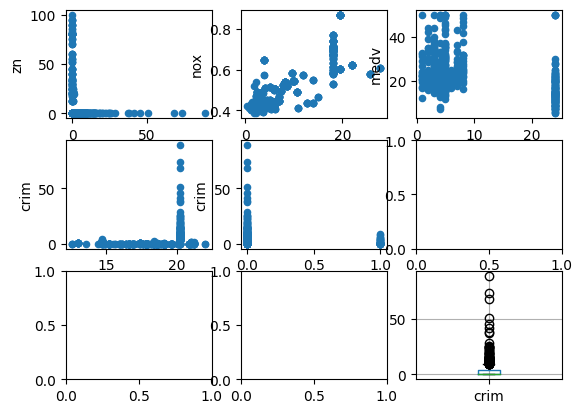

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,3)

df.plot.scatter(x='crim', y='zn', ax=axs[0,0]) # places with over 25000ft zones have very low crime rate, vice versa
df.plot.scatter(x='indus', y='nox', ax=axs[0,1]) # loosely, the more industrial buildings, the higher nitrous oxide concentration
df.plot.scatter(x='rad', y='medv', ax=axs[0,2])
df.plot.scatter(x='ptratio', y='crim', ax=axs[1,0]) # nearly all towns have low crime rates except for those with around 20 pupil to teacher ratio
df.plot.scatter(x='chas', y='crim', ax=axs[1,1]) # towns that bound a river has lower crime rate

# df.plot.scatter(x='', y='', ax=axs[1,2])
# df.plot.scatter(x='', y='', ax=axs[2,0])
# df.plot.scatter(x='', y='', ax=axs[2,1])
# df.plot.scatter(x='', y='', ax=axs[2,2])

In [10]:
# how many suburbs bound the charles river?
df_chas = df.loc[df['chas'] == 1]
df_chas['ptratio'].median()

17.6

In [12]:
# which suburb has the lowest median value for homes
lowest_medv = df.loc[df['medv'] == df['medv'].min()]
lowest_medv

"""
- Crime rate very high
- 0 over 25000sqft lots of zoning
- upper quartile of prop of industrial land
- around upper quartile for nox
- lower quartile for rooms per dwelling
- 100% houses built b4 1940s(old houses)
- very close to employment centres
- highest accesibility to rad highways
- upper quartile in tax rate
- upper quartile ptratio
- high lstat, close to max
"""

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [17]:
# how many average more than 7 rooms / 8 rooms
room_7 = df.loc[df['rm'] > 7]
room_8 = df.loc[df['rm'] > 8]

room_8.describe(), df.describe()

"""
- lot lower crime rates
- similar in zoning, but slightly higher in the upper quartile
- lower industrial prop
- more of them bound charles river
- similar nox
- similar building age
- similar dis to employment centres
- less accessible to radial highways
- left skewed tax rates more vs generally
- slightly lower ptratio
- lot lower lstat
- lot higher medv
"""

(            crim         zn      indus       chas        nox         rm  \
 count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
 mean    0.718795  13.615385   7.078462   0.153846   0.539238   8.348538   
 std     0.901640  26.298094   5.392767   0.375534   0.092352   0.251261   
 min     0.020090   0.000000   2.680000   0.000000   0.416100   8.034000   
 25%     0.331470   0.000000   3.970000   0.000000   0.504000   8.247000   
 50%     0.520140   0.000000   6.200000   0.000000   0.507000   8.297000   
 75%     0.578340  20.000000   6.200000   0.000000   0.605000   8.398000   
 max     3.474280  95.000000  19.580000   1.000000   0.718000   8.780000   
 
              age        dis        rad         tax    ptratio      lstat  \
 count  13.000000  13.000000  13.000000   13.000000  13.000000  13.000000   
 mean   71.538462   3.430192   7.461538  325.076923  16.361538   4.310000   
 std    24.608723   1.883955   5.332532  110.971063   2.410580   1.373566   
 min  